In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")


In [33]:
bitcoin = pd.read_csv('BTC-USD.csv')
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
# print(bitcoin.head())

In [34]:
VOO = pd.read_csv('VOO.csv')
VOO['Date'] = pd.to_datetime(VOO['Date'])
# print(VOO.head())

In [35]:
NASDAQ = pd.read_csv('NASDAQ.csv')
NASDAQ['Date'] = pd.to_datetime(NASDAQ['Date'])
# print(NASDAQ.head())

In [36]:
ethereum = pd.read_csv('ETH-USD.csv')
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
# print(ethereum.head())

In [37]:
# https://fred.stlouisfed.org/series/UNRATE
unemployment = pd.read_csv('UNRATE.csv')
unemployment['DATE'] = pd.to_datetime(unemployment['DATE'])
# print(unemployment.head())

In [38]:
# https://fred.stlouisfed.org/series/GDPC1
GDP = pd.read_csv('GDPC1.csv')
GDP['DATE'] = pd.to_datetime(GDP['DATE'])
# print(GDP.head())

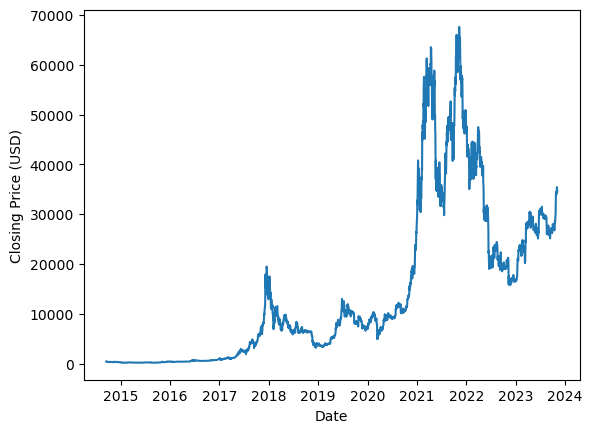

In [39]:
sns.lineplot(x='Date', y='Close', data=bitcoin)
plt.ylabel('Closing Price (USD)')
plt.xlabel('Date')
plt.show()

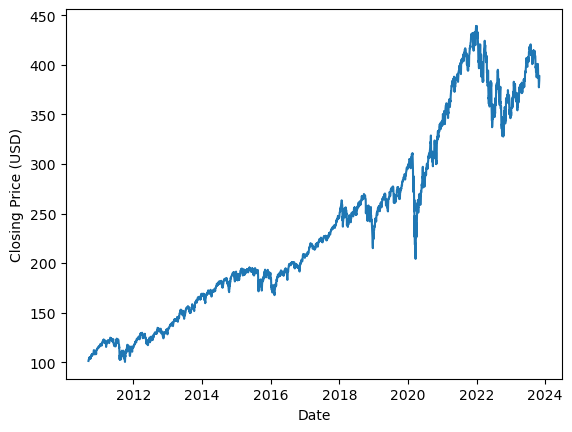

In [40]:
sns.lineplot(x='Date', y='Close', data=VOO)
plt.ylabel('Closing Price (USD)')
plt.xlabel('Date')
plt.show()


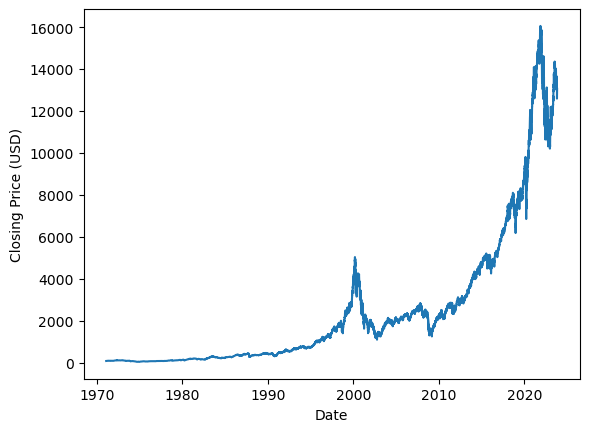

In [41]:
sns.lineplot(x='Date', y='Close', data=NASDAQ)
plt.ylabel('Closing Price (USD)')
plt.xlabel('Date')
plt.show()

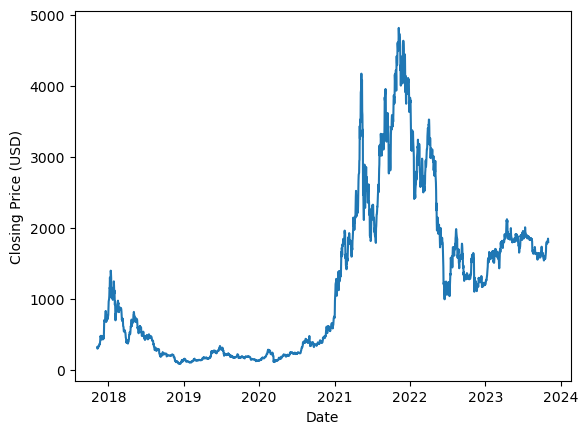

In [42]:
sns.lineplot(x='Date', y='Close', data=ethereum)
plt.ylabel('Closing Price (USD)')
plt.xlabel('Date')
plt.show()

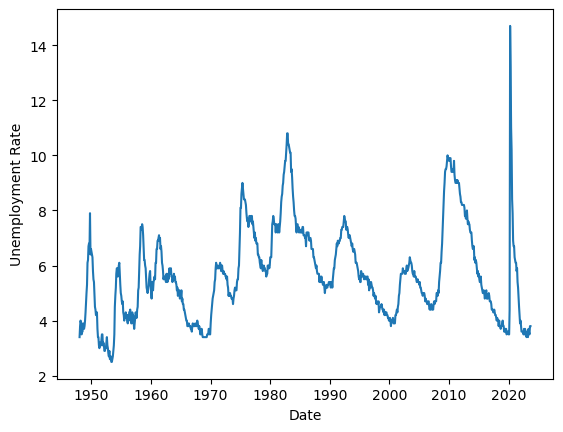

In [43]:
sns.lineplot(x='DATE', y='UNRATE', data=unemployment)
plt.ylabel('Unemployment Rate')
plt.xlabel('Date')
plt.show()

In [44]:
bitcoin.set_index('Date', inplace=True)
ethereum.set_index('Date', inplace=True)
GDP.set_index('DATE', inplace=True)
NASDAQ.set_index('Date', inplace=True)
unemployment.set_index('DATE', inplace=True)
VOO.set_index('Date', inplace=True)

# Resample and forward fill as needed for the analysis
btc_monthly = bitcoin['Close'].resample('M').mean()
eth_monthly = ethereum['Close'].resample('M').mean()
voo_monthly = VOO['Close'].resample('M').mean()
nasdaq_monthly = NASDAQ['Close'].resample('M').mean()
gdp_monthly = GDP['GDPC1'].resample('M').ffill()
unrate_monthly = unemployment['UNRATE'].resample('M').ffill()

# Combine into a single DataFrame
all_data = pd.DataFrame({
    'BTC': btc_monthly,
    'ETH': eth_monthly,
    'VOO': voo_monthly,
    'NASDAQ': nasdaq_monthly,
    'GDP': gdp_monthly,
    'UNRATE': unrate_monthly
}).dropna()


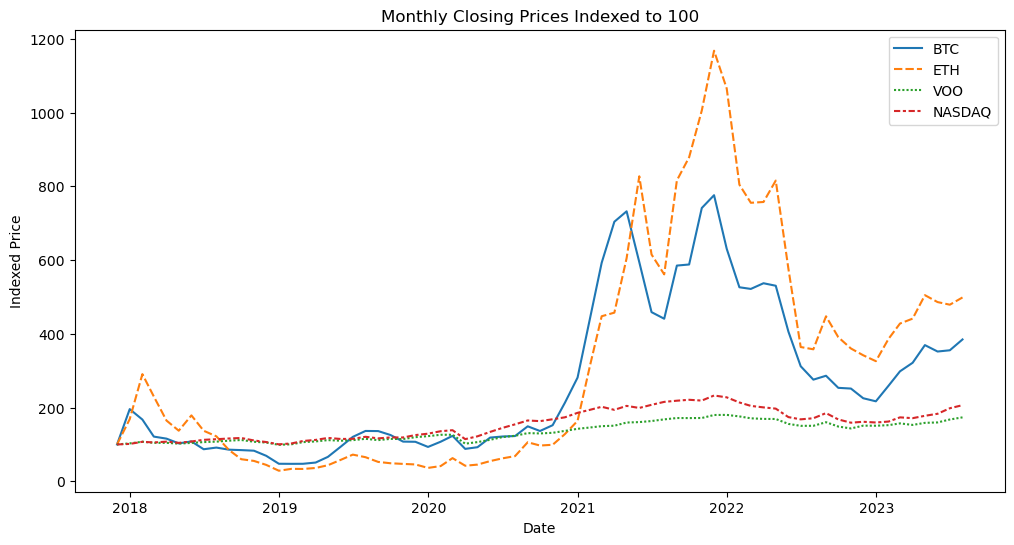

In [45]:
# Normalize the data to start at 100
normalized_data = all_data / all_data.iloc[0] * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=normalized_data[['BTC', 'ETH', 'VOO', 'NASDAQ']])
plt.title('Monthly Closing Prices Indexed to 100')
plt.ylabel('Indexed Price')
plt.xlabel('Date')
plt.show()


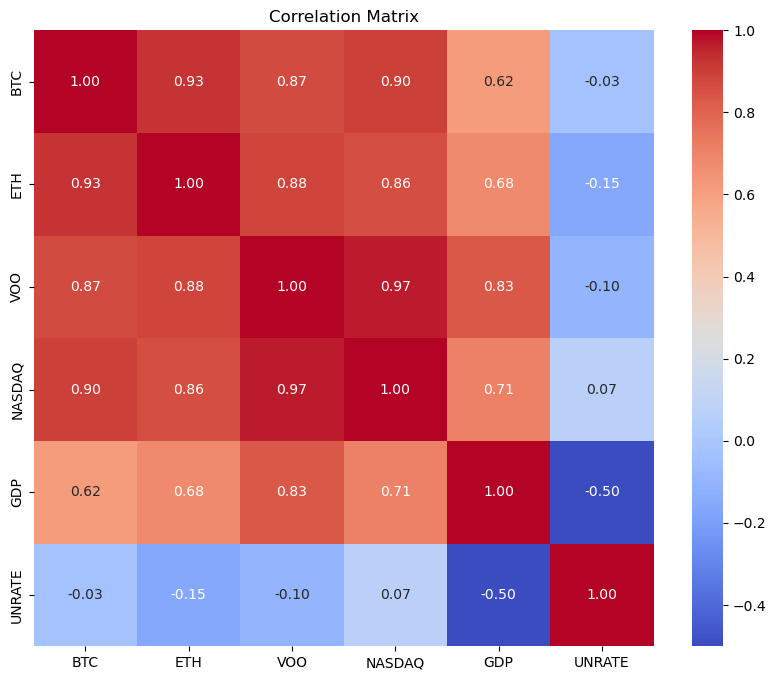

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(all_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


c:\Users\jacks\anaconda3\envs\compsci371\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


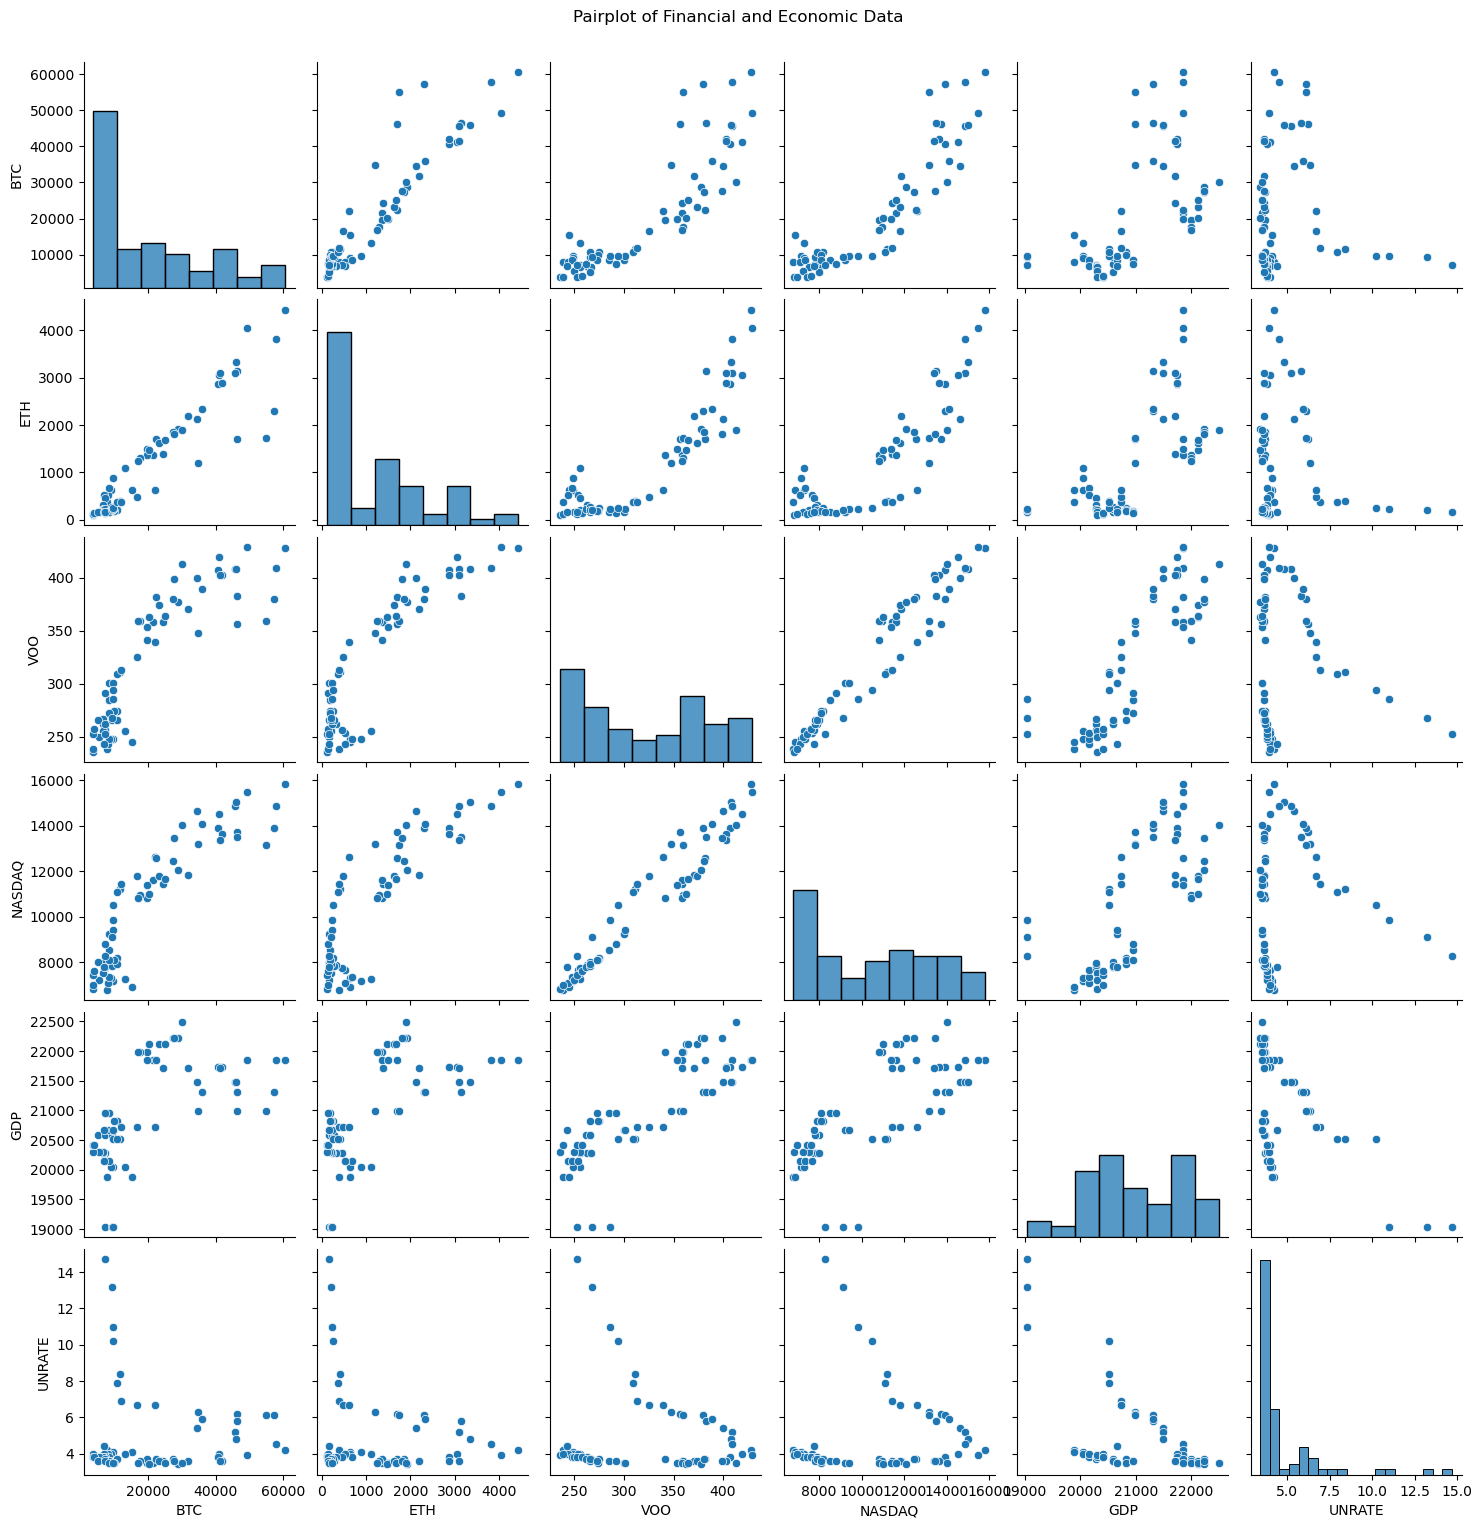

In [47]:
# We'll create a pairplot for a subset of the data to keep it readable.
sns.pairplot(all_data)
plt.suptitle('Pairplot of Financial and Economic Data', y=1.02)  # Adjust the title position
plt.show()